In [4]:
import pandas as pd

# Load the data from the CSV files
users_file_path = './takehome_users.csv'
engagement_file_path = './takehome_user_engagement.csv'

# Reading the user data
users_df = pd.read_csv(users_file_path, encoding='latin1')
# Reading the user engagement data
engagement_df = pd.read_csv(engagement_file_path, encoding='latin1')

In [5]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [19]:
from datetime import timedelta

# Convert 'time_stamp' to datetime for easier manipulation
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])

# Function to check if a user is an adopted user
def is_adopted_user(x):
    """Check if a user is an adopted user based on login data."""
    if len(x) >= 3:  # At least 3 logins
        x = x.sort_values()  # Sort the logins
        for i in range(len(x) - 2):
            # Check if 3 consecutive logins are within a 7-day period
            if x.iloc[i + 2] - x.iloc[i] <= timedelta(days=7):
                return True
    return False

# Group by user and apply the function to check for adopted users
adopted_user_check = engagement_df.groupby('user_id')['time_stamp'].apply(is_adopted_user)

# Convert Series to DataFrame
adopted_users_df = adopted_user_check.to_frame(name='is_adopted_user').reset_index()

# Merge with the user data
users_with_adopted_status = pd.merge(users_df, adopted_users_df, how='left', left_on='object_id', right_on='user_id')

# Fill NaN values in 'is_adopted_user' with False (since NaN means the user never logged in)
users_with_adopted_status['is_adopted_user'] = users_with_adopted_status['is_adopted_user'].fillna(False)
users_with_adopted_status['is_adopted_user'] = users_with_adopted_status['is_adopted_user'].astype(int)
users_with_adopted_status['creation_time'] = pd.to_datetime(users_with_adopted_status['creation_time'])

# Displaying the first few rows of the merged dataframe
users_with_adopted_status.head()

/var/folders/03/xhpkx5wj0vn6tgq603hfg5vr0000gn/T/ipykernel_20043/3440728315.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  users_with_adopted_status['is_adopted_user'] = users_with_adopted_status['is_adopted_user'].fillna(False)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,is_adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5.0,0


Summary Statistics:
         object_id                  creation_time  last_session_creation_time  \
count  12000.00000                          12000                8.823000e+03   
mean    6000.50000  2013-07-16 13:25:32.964499968                1.379279e+09   
min        1.00000            2012-05-31 00:43:27                1.338452e+09   
25%     3000.75000  2013-01-15 21:28:22.750000128                1.363195e+09   
50%     6000.50000     2013-08-05 21:35:19.500000                1.382888e+09   
75%     9000.25000  2014-01-28 10:20:12.249999872                1.398443e+09   
max    12000.00000            2014-05-30 23:59:19                1.402067e+09   
std     3464.24595                            NaN                1.953116e+07   

       opted_in_to_mailing_list  enabled_for_marketing_drip        org_id  \
count              12000.000000                12000.000000  12000.000000   
mean                   0.249500                    0.149333    141.884583   
min                

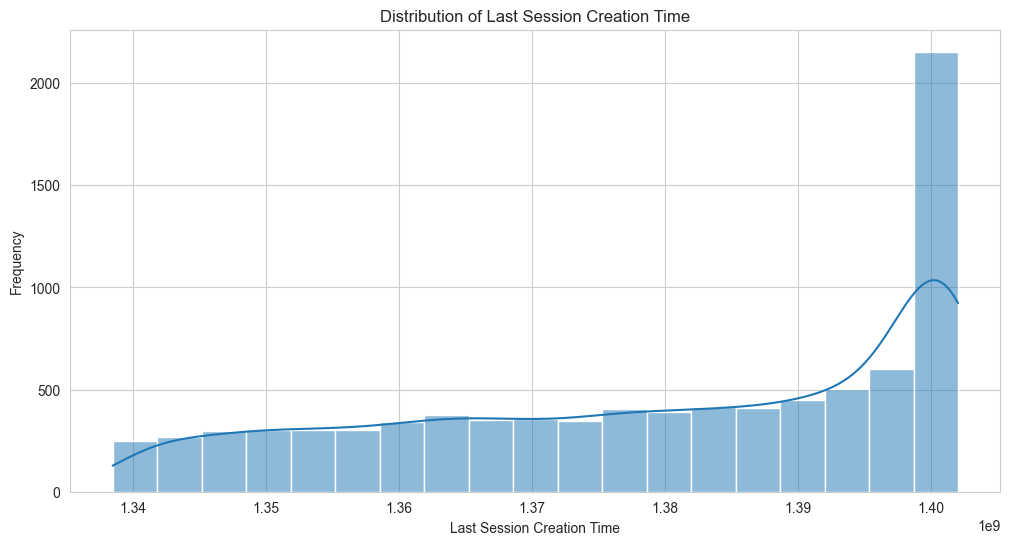

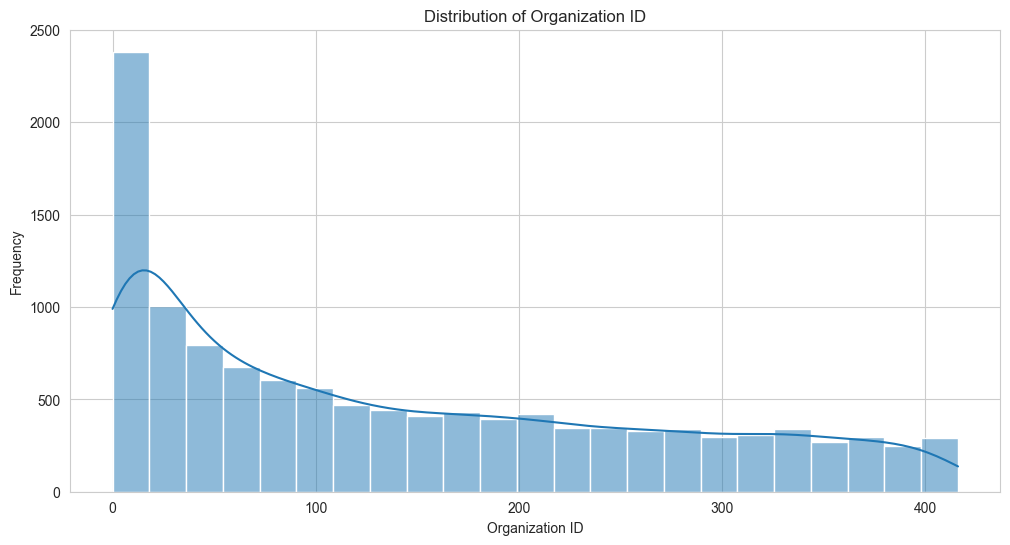

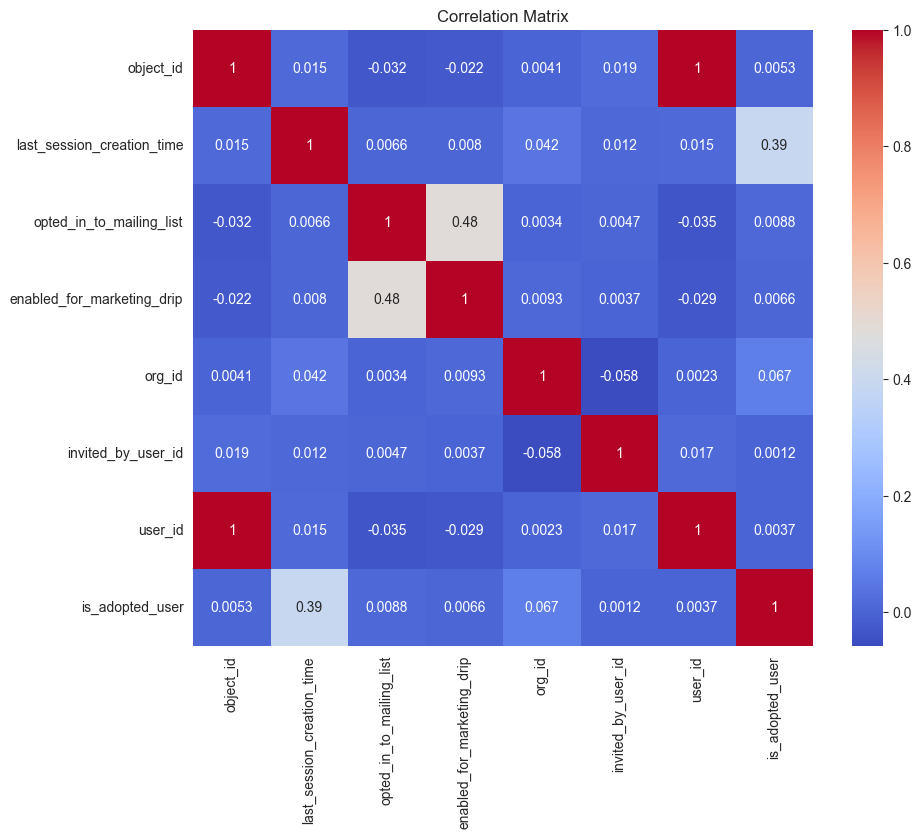

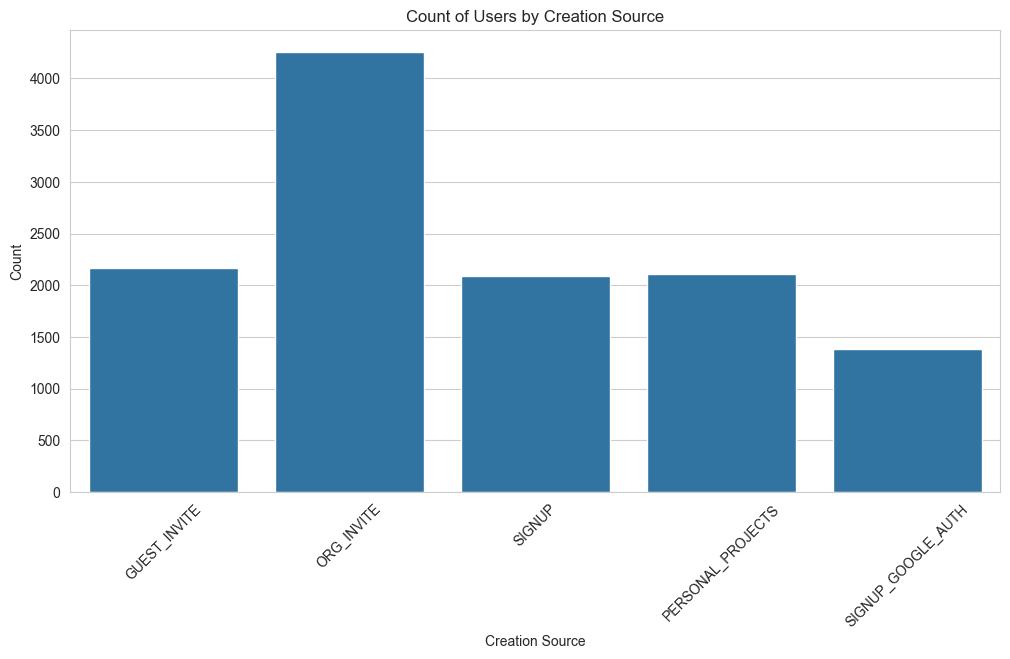

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Summary Statistics
print("Summary Statistics:")
print(users_with_adopted_status.describe())

# Checking for Missing Values
print("\nMissing Values:")
print(users_with_adopted_status.isnull().sum())

# Distribution of Numerical Variables
plt.figure(figsize=(12, 6))
sns.histplot(users_with_adopted_status['last_session_creation_time'].dropna(), kde=True)
plt.title('Distribution of Last Session Creation Time')
plt.xlabel('Last Session Creation Time')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(users_with_adopted_status['org_id'], kde=True)
plt.title('Distribution of Organization ID')
plt.xlabel('Organization ID')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
# Selecting only the numerical columns from the DataFrame
numerical_cols = users_with_adopted_status.select_dtypes(include=['int64', 'float64', 'uint64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Categorical Variables
plt.figure(figsize=(12, 6))
sns.countplot(data=users_with_adopted_status, x='creation_source')
plt.title('Count of Users by Creation Source')
plt.xticks(rotation=45)
plt.xlabel('Creation Source')
plt.ylabel('Count')
plt.show()

/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


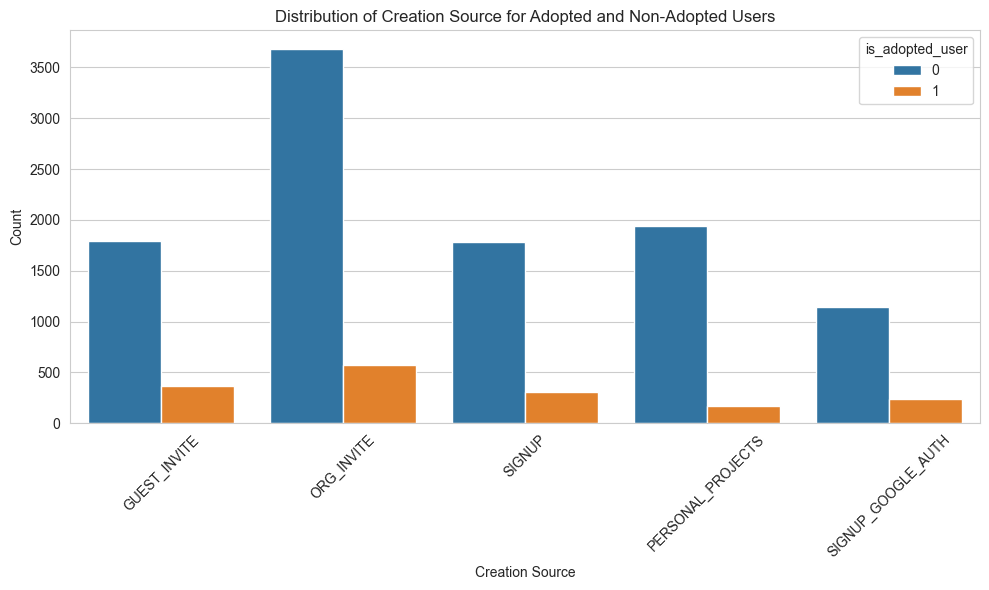

/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


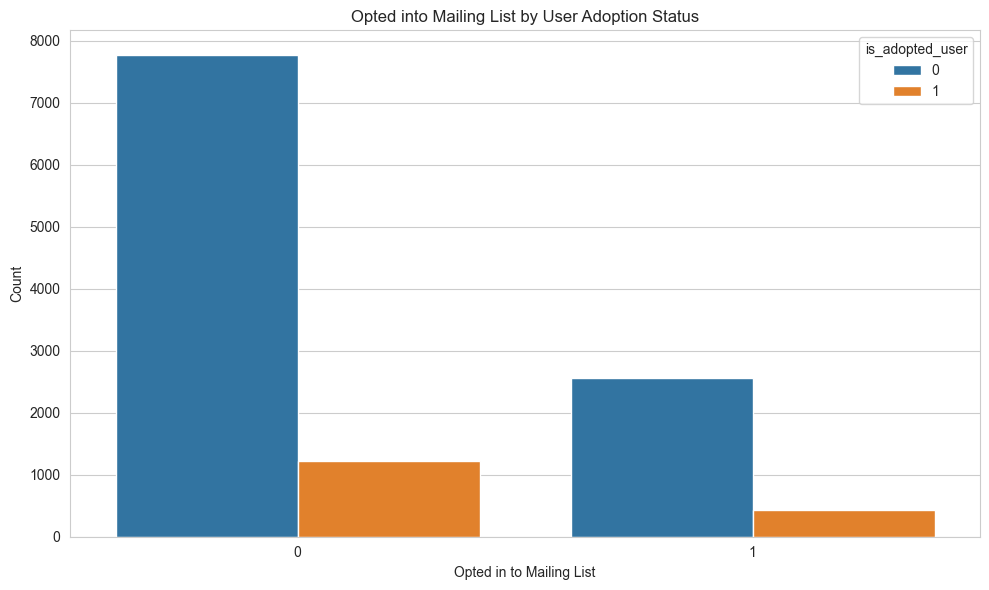

/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


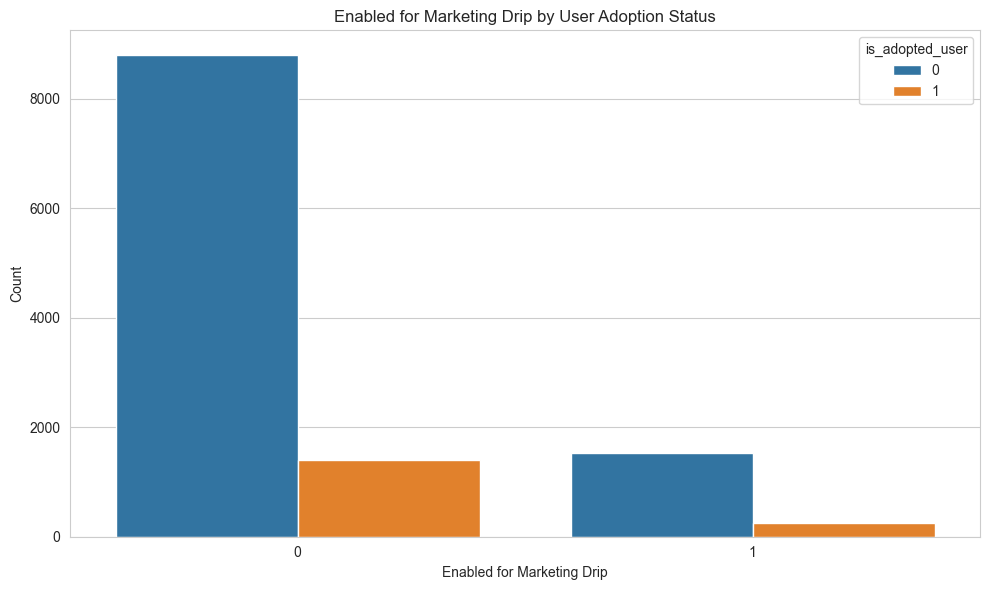

In [15]:
# EDA: Distribution of creation_source among adopted and non-adopted users
plt.figure(figsize=(10, 6))
sns.countplot(data=users_with_adopted_status, x='creation_source', hue='is_adopted_user')
plt.title('Distribution of Creation Source for Adopted and Non-Adopted Users')
plt.xticks(rotation=45)
plt.xlabel('Creation Source')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# EDA: Opted into mailing list
plt.figure(figsize=(10, 6))
sns.countplot(data=users_with_adopted_status, x='opted_in_to_mailing_list', hue='is_adopted_user')
plt.title('Opted into Mailing List by User Adoption Status')
plt.xlabel('Opted in to Mailing List')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# EDA: Enabled for marketing drip
plt.figure(figsize=(10, 6))
sns.countplot(data=users_with_adopted_status, x='enabled_for_marketing_drip', hue='is_adopted_user')
plt.title('Enabled for Marketing Drip by User Adoption Status')
plt.xlabel('Enabled for Marketing Drip')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handle Missing Values
# For simplicity, I'm filling numerical missing values with the median and categorical with the most frequent value
numerical_features = users_with_adopted_status.select_dtypes(include=['int64', 'float64']).drop('is_adopted_user', axis=1).columns
categorical_features = users_with_adopted_status.select_dtypes(include=['object']).columns

# Creating the preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines into one
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Splitting the data into features and target variable
X = users_with_adopted_status.drop('is_adopted_user', axis=1)
y = users_with_adopted_status['is_adopted_user']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Applying the preprocessing pipeline to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Baseline Model
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)

print("Baseline Model Classification Report:")
print(classification_report(y_test, baseline_predictions))

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

print("Logistic Regression Model Classification Report:")
print(classification_report(y_test, logistic_predictions))

Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2051
           1       0.00      0.00      0.00       349

    accuracy                           0.85      2400
   macro avg       0.43      0.50      0.46      2400
weighted avg       0.73      0.85      0.79      2400

Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2051
           1       0.57      0.03      0.06       349

    accuracy                           0.86      2400
   macro avg       0.71      0.51      0.49      2400
weighted avg       0.82      0.86      0.80      2400



/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/sklearn/metrics/_cla

In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))

# Gradient Boosting Machine - XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Classifier Report:")
print(classification_report(y_test, xgb_predictions))

# Support Vector Machine Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("Support Vector Machine Classifier Report:")
print(classification_report(y_test, svm_predictions))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2051
           1       0.75      0.58      0.66       349

    accuracy                           0.91      2400
   macro avg       0.84      0.78      0.80      2400
weighted avg       0.91      0.91      0.91      2400

XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2051
           1       0.72      0.58      0.64       349

    accuracy                           0.91      2400
   macro avg       0.83      0.77      0.80      2400
weighted avg       0.90      0.91      0.90      2400

Support Vector Machine Classifier Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2051
           1       0.68      0.19      0.29       349

    accuracy                           0.87      2400
   macro avg       0.78   

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(10, 20),
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 3)
}

# Create the RandomizedSearchCV model for Random Forest
rf = RandomForestClassifier()
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, 
                                      n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Score for Random Forest:", random_search_rf.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=114; total time=   0.2s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=114; total time=   0.2s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=121; total time=   0.2s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=121; total time=   0.2s
[CV] END max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=114; total time=   0.2s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=4, n_estimators=121; total time=   0.2s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=137; total time=   0.3s
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=137; total time=   0.3s
[CV] END max_depth=11, min_samples_leaf=2, min_samples_split=2, n_estimators=132; total time=   0.2s
[CV] END max_depth=14, min_sam

In [30]:
from scipy.stats import uniform

# Define the parameter distribution for XGBoost
param_dist_xgb = {
    'n_estimators': randint(100, 200),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.5, 0.5),
    'max_depth': randint(3, 7),
    'colsample_bytree': uniform(0.5, 0.5),
    'min_child_weight': randint(1, 5)
}

# Create the RandomizedSearchCV model for XGBoost
xgb = XGBClassifier(random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb, 
                                       n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("Best Score for XGBoost:", random_search_xgb.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.10507143064099161, max_depth=5, min_child_weight=4, n_estimators=160, subsample=0.7984250789732434; total time=   0.8s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.10507143064099161, max_depth=5, min_child_weight=4, n_estimators=160, subsample=0.7984250789732434; total time=   0.9s
[CV] END colsample_bytree=0.6872700594236812, learning_rate=0.10507143064099161, max_depth=5, min_child_weight=4, n_estimators=160, subsample=0.7984250789732434; total time=   0.9s
[CV] END colsample_bytree=0.5115312125207079, learning_rate=0.06247746602583892, max_depth=5, min_child_weight=2, n_estimators=191, subsample=0.9868777594207296; total time=   0.9s
[CV] END colsample_bytree=0.5909124836035503, learning_rate=0.02834045098534338, max_depth=6, min_child_weight=2, n_estimators=121, subsample=0.5035331526098588; total time=   0.9s
[CV] END colsample_bytree=0.590912

In [31]:
from sklearn.metrics import roc_auc_score

# Train the Random Forest model with the best parameters
rf_best = RandomForestClassifier(
    max_depth=16,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=114,
    random_state=42
)
rf_best.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_best.predict(X_test)
rf_proba = rf_best.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Classifier Evaluation:")
print(classification_report(y_test, rf_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_proba))

Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2051
           1       0.00      0.00      0.00       349

    accuracy                           0.85      2400
   macro avg       0.43      0.50      0.46      2400
weighted avg       0.73      0.85      0.79      2400

ROC-AUC Score: 0.8704056585717499


/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Volumes/My Passport for Mac/Springboard stuff/case studies/Ultimate-Technologies-Inc.-Take-Home-Challenge/.venv/lib/python3.11/site-packages/sklearn/metrics/_cla

In [32]:
# Train the XGBoost model with the best parameters
xgb_best = XGBClassifier(
    colsample_bytree=0.974,
    learning_rate=0.107,
    max_depth=4,
    min_child_weight=2,
    n_estimators=108,
    subsample=0.508,
    random_state=42
)
xgb_best.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_best.predict(X_test)
xgb_proba = xgb_best.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Classifier Evaluation:")
print(classification_report(y_test, xgb_predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_proba))

XGBoost Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2051
           1       0.73      0.60      0.66       349

    accuracy                           0.91      2400
   macro avg       0.83      0.78      0.80      2400
weighted avg       0.90      0.91      0.91      2400

ROC-AUC Score: 0.9088068019094746


In [48]:
# Assuming 'preprocessor' is fitted to the training data
categorical_features_transformed = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

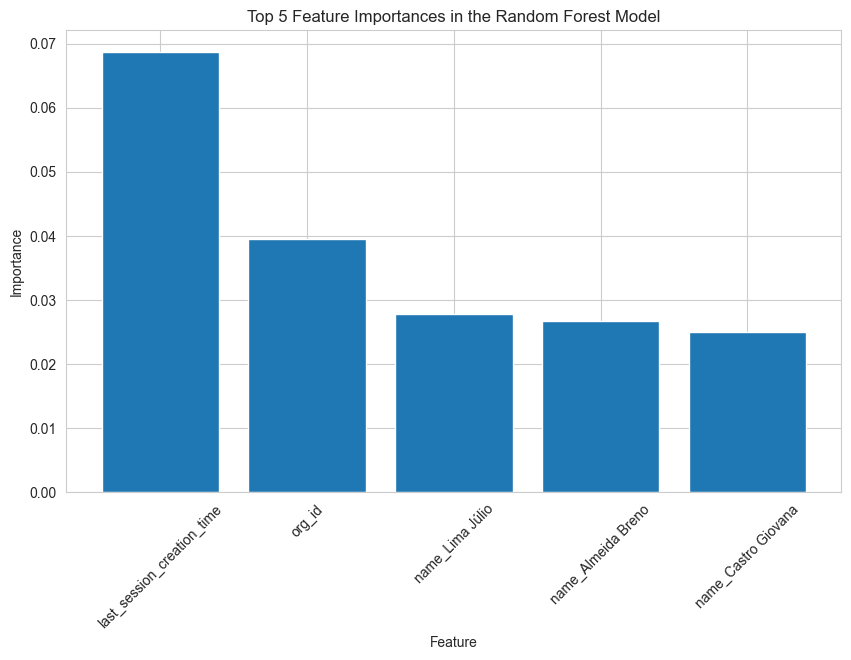

In [49]:
import numpy as np

# Get feature importances
importances = rf_best.feature_importances_

# Combine numerical and categorical feature names
all_feature_names = np.concatenate((numerical_features, categorical_features_transformed))

# Sort features by their importance
sorted_indices = np.argsort(importances)[::-1]
top_indices = sorted_indices[:5]

# Selecting top 5 features and their importances
top_features = all_feature_names[top_indices]
top_importances = importances[top_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Top 5 Feature Importances in the Random Forest Model")
plt.bar(range(len(top_importances)), top_importances, align='center')
plt.xticks(range(len(top_importances)), top_features, rotation=45)
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()


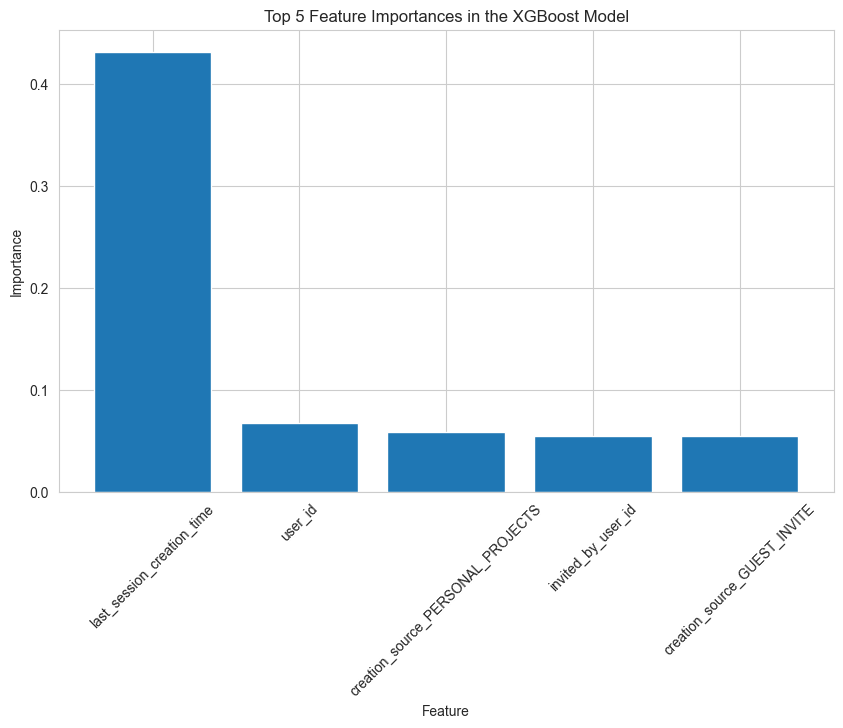

In [51]:
# Get feature importances
importances = xgb_best.feature_importances_

# Sort features by their importance
sorted_indices = np.argsort(importances)[::-1]
top_indices = sorted_indices[:5]

# Selecting top 5 features and their importances
top_features = all_feature_names[top_indices]
top_importances = importances[top_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Top 5 Feature Importances in the XGBoost Model")
plt.bar(range(len(top_importances)), top_importances, align='center')
plt.xticks(range(len(top_importances)), top_features, rotation=45)
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()